In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [2]:
#Read in the data
df = pd.read_excel('England_Premier-League_2022-2023_Liverpool_vs_Arsenal.xlsx')

In [3]:
#convert the data to match the mplsoccer statsbomb pitch
#to see how to create the pitch, watch the video here: https://www.youtube.com/watch?v=55k1mCRyd2k
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

In [4]:
df = df[df["type"] == "Pass"]

df

,minute,second,h_a,x,y,type,outcomeType,playerName,endX,endY,Setpiece,xT,shirtNo,position,team,country,competition,season
0,0,0.0,a,60.00,40.00,Pass,Successful,Granit Xhaka,44.40,39.52,0.0,-0.003329,34,MC,Arsenal,England,Premier-League,2022-2023
1,0,3.0,a,44.04,41.20,Pass,Successful,Oleksandr Zinchenko,43.20,62.32,0.0,-0.000492,35,DL,Arsenal,England,Premier-League,2022-2023
3,0,5.0,a,43.80,64.80,Pass,Successful,Gabriel Magalhães,61.92,78.64,0.0,0.002081,6,DC,Arsenal,England,Premier-League,2022-2023
5,0,8.0,a,54.12,77.04,Pass,Successful,Gabriel Martinelli,32.40,53.04,0.0,-0.001518,11,FWL,Arsenal,England,Premier-League,2022-2023
7,0,15.0,a,28.80,48.24,Pass,Unsuccessful,Rob Holding,83.88,3.68,0.0,NaN,16,DC,Arsenal,England,Premier-League,2022-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,95,25.0,h,25.08,50.80,Pass,Successful,Alisson,51.36,61.68,0.0,0.003309,1,GK,Liverpool,England,Premier-League,2022-2023
1818,95,30.0,h,66.48,59.60,Pass,Unsuccessful,Darwin Núñez,89.16,22.56,0.0,NaN,27,Sub,Liverpool,England,Premier-League,2022-2023
1821,95,38.0,a,30.72,59.44,Pass,Successful,Kieran Tierney,46.20,76.24,1.0,0.001019,3,Sub,Arsenal,England,Premier-League,2022-2023
1823,95,45.0,a,66.36,76.32,Pass,Successful,Gabriel Martinelli,82.08,78.40,0.0,0.005061,11,FWL,Arsenal,England,Premier-League,2022-2023


C:\Users\frang\AppData\Local\Temp\ipykernel_21180\3112702316.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(


Text(0.5, 1.0, 'Mohamed Salah vs Arsenal')

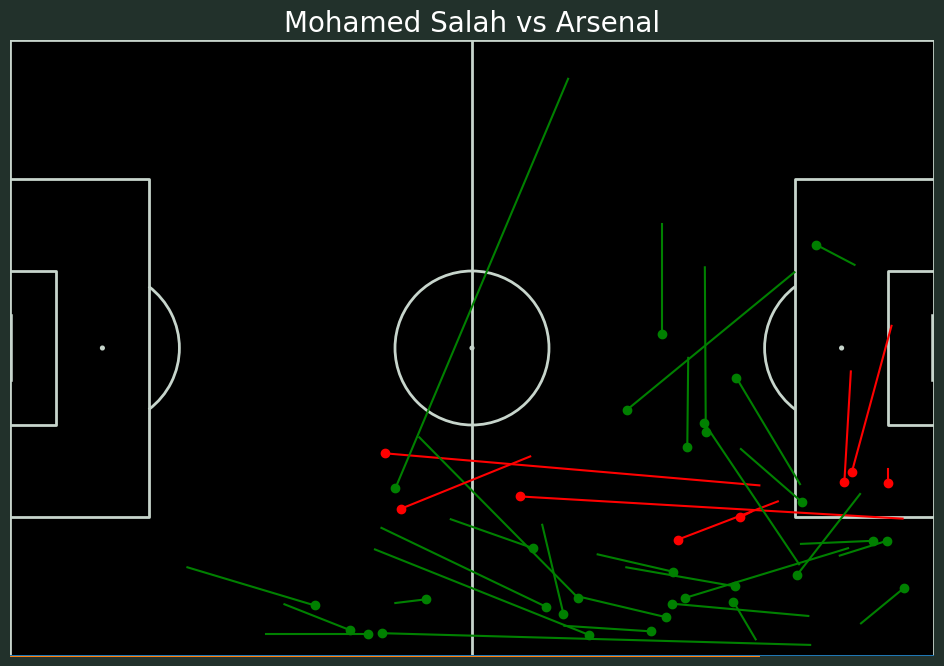

In [5]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

# create the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#000000', line_color='#c7d5cc',
              pitch_length=8, pitch_width=13)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#Create the heatmap
kde = sns.kdeplot(
        data=df[['x', 'y']],  # pass both x and y columns as a single 2D array
        shade=True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        legend=False   # Agrega esta línea para quitar la leyenda
)

gj_df = df[df['playerName'] == 'Mohamed Salah']

#use a for loop to plot each pass
for x in range(len(gj_df['x'])):
    if gj_df['outcomeType'].iloc[x] == 'Successful':
        plt.plot((gj_df['x'].iloc[x], gj_df['endX'].iloc[x]), 
                 (gj_df['y'].iloc[x], gj_df['endY'].iloc[x]), color='green')
        plt.scatter(gj_df['x'].iloc[x], gj_df['y'].iloc[x], color='green')
    if gj_df['outcomeType'].iloc[x] == 'Unsuccessful':
        plt.plot((gj_df['x'].iloc[x], gj_df['endX'].iloc[x]), 
                 (gj_df['y'].iloc[x], gj_df['endY'].iloc[x]), color='red')
        plt.scatter(gj_df['x'].iloc[x], gj_df['y'].iloc[x], color='red')

plt.xlim(0, 120)
plt.ylim(0, 80)

plt.title('Mohamed Salah vs Arsenal', color='white', size=20)